In [1]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [2]:
! pwd

/Users/pavanmreddy/Downloads/Data_Science_Project


In [ ]:
# ! git clone https://github.com/joshuaaduarte/categorize_ethnicity.git

Cloning into 'categorize_ethnicity'...
remote: Enumerating objects: 97645, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 97645 (delta 4), reused 25 (delta 4), pack-reused 97620
Receiving objects: 100% (97645/97645), 537.43 MiB | 16.83 MiB/s, done.
Resolving deltas: 100% (50/50), done.
Updating files: 100% (115707/115707), done.


In [3]:
# import the libraries as shown below
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [4]:
# change the paths with respect to the local computer path for Josh
IMAGE_SIZE = [224,224]
train_path = "/Users/pavanmreddy/Downloads/categorize_ethnicity/train_raw"
test_path = "/Users/pavanmreddy/Downloads/categorize_ethnicity/val_raw"

In [5]:
vgg19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

Metal device set to: Apple M1 Max
80134624/80134624 [==============================] - 3s 0us/step


In [10]:
# don't train existing weights
for layer in vgg19.layers:
    layer.trainable = False

In [11]:
folders = glob('/Users/pavanmreddy/Downloads/categorize_ethnicity/train_raw/*')

In [12]:
folders

['/Users/pavanmreddy/Downloads/categorize_ethnicity/train_raw/Indian',
 '/Users/pavanmreddy/Downloads/categorize_ethnicity/train_raw/Latino_Hispanic',
 '/Users/pavanmreddy/Downloads/categorize_ethnicity/train_raw/East Asian',
 '/Users/pavanmreddy/Downloads/categorize_ethnicity/train_raw/Middle Eastern',
 '/Users/pavanmreddy/Downloads/categorize_ethnicity/train_raw/White',
 '/Users/pavanmreddy/Downloads/categorize_ethnicity/train_raw/Southeast Asian',
 '/Users/pavanmreddy/Downloads/categorize_ethnicity/train_raw/Black']

In [13]:
len(folders)

7

In [14]:
# giving better results
x = Flatten()(vgg19.output)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg19.input, outputs=prediction)

In [15]:
IMG_SIZE = 224
CHANNELS = 3
NUM_CLASSES = 7
BATCH_SIZE = 32

In [16]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [17]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   rotation_range=2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [19]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 69734 images belonging to 7 classes.


In [20]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 27660 images belonging to 7 classes.


In [21]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set)// BATCH_SIZE + 1,
  validation_steps=len(test_set)// BATCH_SIZE + 1,
)

Epoch 1/10


2023-05-05 02:00:20.781337: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


69/69 [==============================] - 21s 274ms/step - loss: 2.3656 - accuracy: 0.1975 - val_loss: 2.1079 - val_accuracy: 0.2355
Epoch 2/10
69/69 [==============================] - 20s 293ms/step - loss: 1.9821 - accuracy: 0.2572 - val_loss: 1.9885 - val_accuracy: 0.2121
Epoch 3/10
69/69 [==============================] - 21s 299ms/step - loss: 2.0174 - accuracy: 0.2523 - val_loss: 1.9231 - val_accuracy: 0.2679
Epoch 4/10
69/69 [==============================] - 21s 302ms/step - loss: 2.0573 - accuracy: 0.2740 - val_loss: 1.9957 - val_accuracy: 0.2556
Epoch 5/10
69/69 [==============================] - 21s 304ms/step - loss: 1.9417 - accuracy: 0.2966 - val_loss: 1.8636 - val_accuracy: 0.3013
Epoch 6/10
69/69 [==============================] - 21s 308ms/step - loss: 1.9362 - accuracy: 0.2971 - val_loss: 1.8012 - val_accuracy: 0.3326
Epoch 7/10
69/69 [==============================] - 22s 312ms/step - loss: 1.9633 - accuracy: 0.3053 - val_loss: 1.8670 - val_accuracy: 0.3092
Epoch 8/10

In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/50
78/78 [==============================] - 43s 555ms/step - loss: 1.3567 - accuracy: 0.5606 - val_loss: 1.4356 - val_accuracy: 0.5020
Epoch 2/50
78/78 [==============================] - 45s 569ms/step - loss: 1.3352 - accuracy: 0.5614 - val_loss: 1.4174 - val_accuracy: 0.5079
Epoch 3/50
78/78 [==============================] - 44s 558ms/step - loss: 1.3049 - accuracy: 0.5755 - val_loss: 1.3990 - val_accuracy: 0.5119
Epoch 4/50
78/78 [==============================] - 43s 554ms/step - loss: 1.2900 - accuracy: 0.5836 - val_loss: 1.3831 - val_accuracy: 0.5218
Epoch 5/50
78/78 [==============================] - 44s 556ms/step - loss: 1.2769 - accuracy: 0.5820 - val_loss: 1.3698 - val_accuracy: 0.5218
Epoch 6/50
78/78 [==============================] - 42s 536ms/step - loss: 1.2632 - accuracy: 0.5751 - val_loss: 1.3565 - val_accuracy: 0.5198
Epoch 7/50
78/78 [==============================] - 44s 558ms/step - loss: 1.2378 - accuracy: 0.5929 - val_loss: 1.3445 - val_accuracy: 0.5278

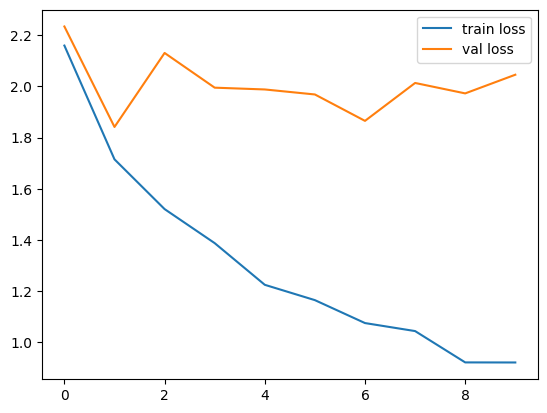

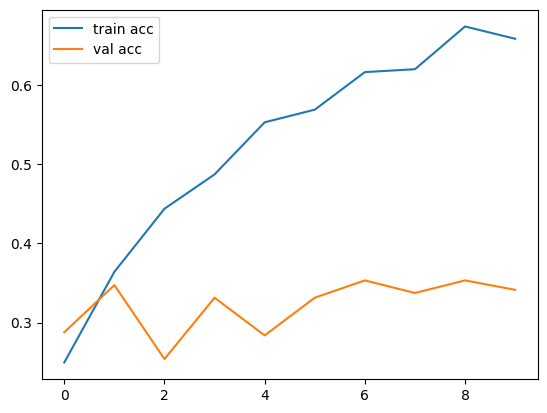

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)

In [ ]:
! mkdir /content/gdrive/MyDrive/DataScience_Project/modelweights

In [ ]:
! cd mkdir /content/gdrive/MyDrive/DataScience_Project/modelweights

In [ ]:
! pwd

In [ ]:
from tensorflow.keras.models import load_model
model.save('model_vggface50raw.h5')